In [2]:
import os
import pandas as pd
import glob

In [ ]:
'''
    For the given path, get the List of all files in the directory tree 
'''
def getListOfFiles(dirName):
    # create a list of file and sub directories 
    # names in the given directory 
    listOfFile = os.listdir(dirName)
    allFiles = list()
    # Iterate over all the entries
    for entry in listOfFile:
        # Create full path
        fullPath = os.path.join(dirName, entry)
        # If entry is a directory then get the list of files in this directory 
        if os.path.isdir(fullPath):
            allFiles = allFiles + getListOfFiles(fullPath)
        else:
            allFiles.append(fullPath)
                
    return allFiles      

def scan_report_summary():
    
    #dirName = '/home/varun/Downloads';
    dirName = r'\\lnshare\public\IT\Onedrive_Migration\MigrationTool\msclenavi.it'
    
    # Get the list of all files in directory tree at given path
    listOfFiles = getListOfFiles(dirName)
    
    # Print the files
    #for elem in listOfFiles:
    #    print(elem)
    #print ("****************")
    
    # Get the list of all files in directory tree at given path
    listOfFiles = list()
    for (dirpath, dirnames, filenames) in os.walk(dirName):
        listOfFiles += [os.path.join(dirpath, file) for file in filenames]
        
    df_full = pd.DataFrame()
    content = [] 
    # Print the files    
    for elem in listOfFiles:
        basename = os.path.basename(elem)
        if basename == 'SummaryReport.csv':
            print('Location:', elem)
            #print('File Name:', elem.split("\\")[-1])
            df = pd.read_csv(elem, usecols=[0,1,5,13,14,15])
            #print(df)
            df_full = df_full.append(df, ignore_index=True)
    print('-----------------------Dopo LOOP:')
    print(df_full)

    return df_full

if __name__ == '__main__':
    df_user_email = scan_report_summary() 
    temp = ''
    user_email_prev = ''
    for index in range(len(df_user_email)):
        folder = str(df_user_email['Source'].iloc[index])
        user_email = df_user_email['Destination'].iloc[index].rsplit('/', 1)[1]
        user_email = user_email.replace('_', '.')
        user_email = user_email.replace('.msclenavi.it', '@msclenavi.it')
        migrated_bytes = str(df_user_email['Migrated bytes'].iloc[index])
        duration = str(df_user_email['Duration'].iloc[index])
        if user_email == user_email_prev:
            temp += user_email + ' ' + migrated_bytes
        else:
            temp = user_email + ' ' + migrated_bytes
            user_email_prev = user_email
            print(f'Sending Email to: {user_email} - Moved folder: {folder} - Migrated bytes: {migrated_bytes} in {duration}')
        


In [141]:
import numpy as np

def show_values(axs, orient="v", space=.01):
    def _single(ax):
        if orient == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                value = '{:.1f}'.format(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif orient == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - (p.get_height()*0.5)
                value = '{:.0f}'.format(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)

In [5]:
import os
from os import scandir

total_size = 0
start_path = r'\\lnshare\GrellaG'  # To get size of current directory
ROOT_DIRECTORY = "\\lnshare"

folders = scandir(ROOT_DIRECTORY)

os.walk(ROOT_DIRECTORY)
[item[0] for item in os.walk(ROOT_DIRECTORY)]
    for path, dirs, files in os.walk(start_path):
        for f in files:
            fp = os.path.join(path, f)
            total_size += os.path.getsize(fp)
    print("Directory size: " + str(total_size))

Directory size: 15926745968


In [8]:
root = r'\\lnshare\GrellaG'
total_size = 0
for entry in os.scandir(root):
   if entry.is_dir():
       typ = 'dir'
   elif entry.is_file():
        typ = 'file'
        fp = os.path.join(root, entry)
        total_size += os.path.getsize(fp)
   elif entry.is_symlink():
       typ = 'link'
   else:
       typ = 'unknown'
   print('{name} {typ}'.format(
       name=entry.name,
       typ=typ,
   ))
print("Directory size: " + str(total_size))

.SonarCloudToken dir
.Valutazione dir
0070127350.pdf file
119 - Non manifest charges to be billed (LN) - NEW - 20170131.xlsx file
119 - Non manifest charges to be billed (LN) - OLD - 20170131.xlsx file
19545.txt file
270_Report.txt file
90Backup_All_90_Databases.log file
90Move to Accounting90.docx file
AGENCY REMUNERATION -001002003 - 001002004 - 001002006.txt file
aldo.txt file
Analisi Locked BL EMC dir
Analisi_Booking_INTTRA_ResponseTime_v_originale.xlsx file
Azure dir
b.txt file
Biblioteca dir
C.txt file
CalcagniM.JPG file
Capture.JPG file
Chemlink dir
Crociere dir
CSV_File dir
CVS dir
D.txt file
DayPilot dir
DB_List.txt file
Desktop - Personal dir
Documentazione dir
Edizione_2021_11_11.pdf file
error invoice.docx file
Excel_DATASOURCE dir
Excel_Macro dir
Excel_OUTPUT dir
FileshareFiliali2 dir
FLASHPOINT_SU_ITPS.docx file
Font dir
Forecast XLS.rdl file
GVA dir
HTA dir
IBIS dir
IBIS_LinkedServer.jpg file
IBIS_LinkedServer_02.jpg file
IBIS_LinkedServer_03.jpg file
IBIS_LinkedServer_0

In [ ]:
import seaborn as sns 
import matplotlib.pyplot as plt

#df_user_email['Destination'].str.len()
#df_user_email['user'] = df_user_email['Destination'].str[-30:]

df_user_email['user'] = df_user_email['Destination'].str.replace('https://mydocs.msc.com/personal/','')
df_user_email['user'] = df_user_email['user'].str.replace('_msclenavi_it','')
df_user_email['user'] = df_user_email['user'].str.replace('_','.')

df_2 = df_user_email.groupby(['user']).agg(sum_migrated_bytes =("Migrated bytes",'sum'))
df_2.reset_index(inplace=True)
df_2.head()
g = sns.barplot(x='sum_migrated_bytes', y='user', data=df_2)
g.set_xticklabels(g.get_xticklabels(),  rotation=60)

#show values on barplot
show_values(g, "h", space=0)

plt.savefig("OnedriveMigration_barplot_Seaborn_00.png")

C:\Users\ADMINI~1.MSC\AppData\Local\Temp/ipykernel_16712/1075805438.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(g.get_xticklabels(),  rotation=90)


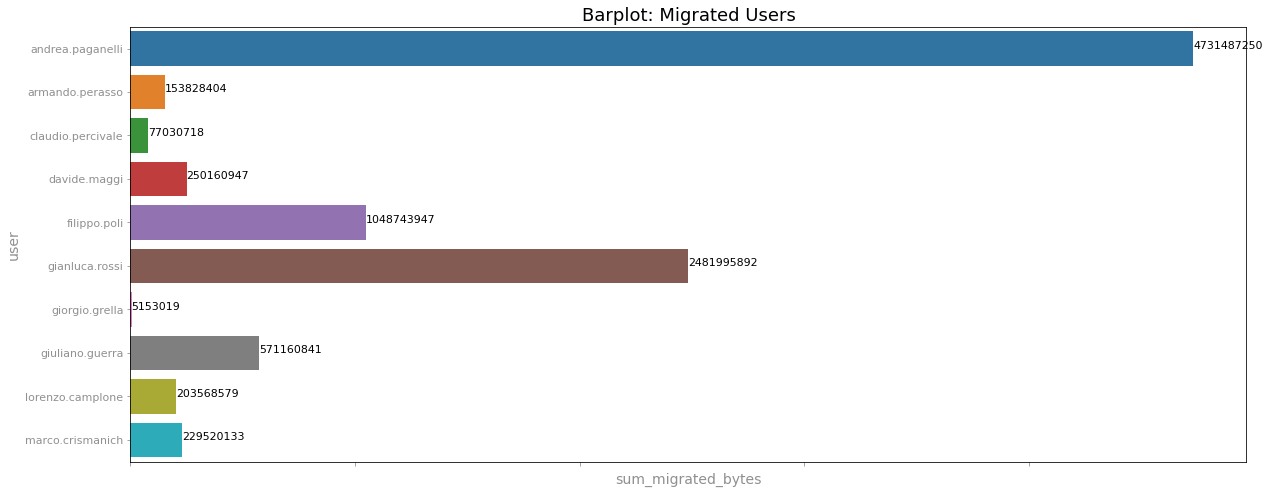

In [159]:
plt.figure(figsize=(20, 8))
g = sns.barplot(x="sum_migrated_bytes", 
    y="user",
    data=df_2,
    ci=None )
plt.ylabel("user", size=14)
plt.xlabel("sum_migrated_bytes", size=14)
plt.title("Barplot: Migrated Users", size=18)

g.set_xticklabels(g.get_xticklabels(),  rotation=90)
#show values on barplot
show_values(g, "h", space=0)
plt.savefig("OnedriveMigration_barplot_Seaborn.png")

['andrea.paganelli', 'armando.perasso', 'claudio.percivale', 'davide.maggi', 'filippo.poli', 'gianluca.rossi', 'giorgio.grella', 'giuliano.guerra', 'lorenzo.camplone', 'marco.crismanich']
[4731487250, 153828404, 77030718, 250160947, 1048743947, 2481995892, 5153019, 571160841, 203568579, 229520133]


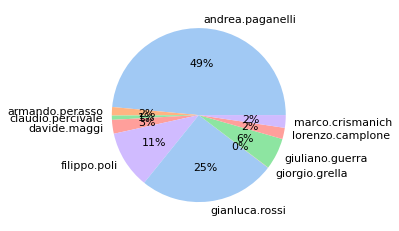

In [158]:
#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]

op_col = []
for i in df_2['user']:
    op_col.append(i)
print(op_col)

op_row = []
for i in df_2['sum_migrated_bytes']:
    op_row.append(i)
print(op_row)

#create pie chart
plt.pie(op_row, labels = op_col, colors = colors, autopct='%.0f%%')
plt.show()


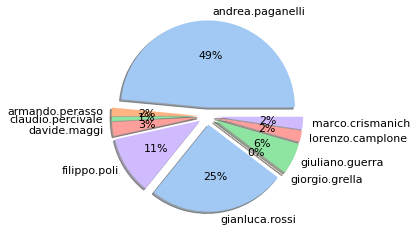

In [156]:
#we can add explode parameter to pop out the different sections of our pie chart
#remove explode parameter for a normal pie chart
plt.pie(op_row, labels = op_col, colors = colors, shadow = True, explode = (0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1), autopct='%.0f%%')
plt.show()

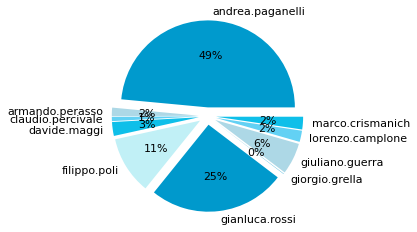

In [157]:
plt.rcParams['text.color'] = '#000000'
plt.rcParams['axes.labelcolor']= '#909090'
plt.rcParams['xtick.color'] = '#909090'
plt.rcParams['ytick.color'] = '#909090'
plt.rcParams['font.size']=11
color_palette_list = ['#009ACD', '#ADD8E6', '#63D1F4', '#0EBFE9',   
                      '#C1F0F6', '#0099CC']
plt.pie(op_row, labels=op_col, colors=color_palette_list, autopct='%1.0f%%', explode = (0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1))
plt.show()